<img src='https://github.com/claricefiorese/estudos-python/blob/main/Relat%C3%B3rio%20do%20Mochileiro%20(4).png?raw=true'/>

## Prólogo

A CMFF Galaxy está enfrentando um problema de vendas e operações, seus clientes estão espalhados por toda a galáxia e têm diferentes noções de tempo. E isso é um enorme problema, porque a CMFF não consegue entender o padrão de vendas de seus produtos.

Por isso, eu fui convocada a participar de uma jornada galáctica para ajudar a empresa a entender melhor seu padrão de vendas, e planejar suas operações e a compra de commodities que utiliza em seus produtos, tendo assim menos incertezas sobre sua demanda e vendas.

## Não esqueça sua toalha!

Não podemos começar a nossa jornada sem ela, a toalha! Pegamos ainda escova de dentes, esponja, sabonete, lata de biscoitos, bússola, mapa, barbante, repelente, capa de chuva, traje espacial, algumas bibliotecas Python e algumas funções!

Pode olhar à vontade, mas por favor, não mexa em nada, ok?

>"Se um sujeito é capaz de rodar por toda a Galáxia, acampar, pedir carona, lutar contra terríveis obstáculos, dar a volta por cima e ainda assim saber onde está sua toalha, esse sujeito claramente merece respeito."


In [ ]:
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [ ]:
!pip install pmdarima

In [ ]:
import numpy                       as np
import pandas                      as pd
import matplotlib.pyplot           as plt
import matplotlib.ticker           as ticker
import seaborn                     as sns
import statsmodels.api             as sm

from pandas                        import read_csv
from datetime                      import datetime
from sklearn.linear_model          import LinearRegression
from sklearn.preprocessing         import PolynomialFeatures 
from statsmodels.tsa.seasonal      import seasonal_decompose
from math                          import sqrt
from sklearn.metrics               import mean_squared_error, mean_absolute_error, mean_absolute_error
from statsmodels.tsa.stattools     import adfuller
from pmdarima.arima                import OCSBTest, ADFTest, ndiffs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima                      import auto_arima
from statsmodels.tsa.api           import ExponentialSmoothing
from fbprophet                     import Prophet

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set(font_scale=1.1)

#Alterando o formato global de exibição dos dados
pd.options.display.float_format="{:.2f}".format

In [ ]:
def anotacao(grafico):
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

In [ ]:
def serie_temporal_planeta(df): 
  
  mars = df.query("planet == 'mars'").reset_index()
  earth = df.query("planet == 'earth'").reset_index()

  df_mars = mars.resample('W', on='date').count().drop(columns=['date', 'geocode', 'price',	'planet',	'product']).rename(columns={'index': 'total_vendas'}).reset_index()
  df_earth = earth.resample('W', on='date').count().drop(columns=['date', 'geocode', 'price',	'planet',	'product']).rename(columns={'index': 'total_vendas'}).reset_index()

  df_mars['year_week'] = df_mars['date'].dt.strftime('%U').astype('int32')
  df_earth['year_week'] = df_earth['date'].dt.strftime('%U').astype('int32')

  df_mars_week = df_mars.groupby(['year_week'])['total_vendas'].sum()
  df_earth_week = df_earth.groupby(['year_week'])['total_vendas'].sum()

  return df_mars_week, df_earth_week

In [ ]:
def serie_temporal_produto(df):
    
  eddie = df.query("product == 'eddie'").reset_index()
  iid = df.query("product == 'infinite improbability drive'").reset_index()
  towel = df.query("product == 'towel'").reset_index()
  dt = df.query("product == 'deep though'").reset_index()
  vp = df.query("product == 'vogon poetry'").reset_index()
  marwin = df.query("product == 'marwin'").reset_index()

  df_eddie = eddie.resample('W', on='date').count().drop(columns=['date', 'geocode', 'price',	'planet',	'product']).rename(columns={'index': 'total_vendas'}).reset_index()
  df_iid = iid.resample('W', on='date').count().drop(columns=['date', 'geocode', 'price',	'planet',	'product']).rename(columns={'index': 'total_vendas'}).reset_index()
  df_towel = towel.resample('W', on='date').count().drop(columns=['date', 'geocode', 'price',	'planet',	'product']).rename(columns={'index': 'total_vendas'}).reset_index()
  df_dt = dt.resample('W', on='date').count().drop(columns=['date', 'geocode', 'price',	'planet',	'product']).rename(columns={'index': 'total_vendas'}).reset_index()
  df_vp = vp.resample('W', on='date').count().drop(columns=['date', 'geocode', 'price',	'planet',	'product']).rename(columns={'index': 'total_vendas'}).reset_index()
  df_marwin = marwin.resample('W', on='date').count().drop(columns=['date', 'geocode', 'price',	'planet',	'product']).rename(columns={'index': 'total_vendas'}).reset_index()

  df_eddie['year_week'] = df_eddie['date'].dt.strftime('%U').astype('int32')
  df_iid['year_week'] = df_iid['date'].dt.strftime('%U').astype('int32')
  df_towel['year_week'] = df_towel['date'].dt.strftime('%U').astype('int32')
  df_dt['year_week'] = df_dt['date'].dt.strftime('%U').astype('int32')
  df_vp['year_week'] = df_vp['date'].dt.strftime('%U').astype('int32')
  df_marwin['year_week'] = df_marwin['date'].dt.strftime('%U').astype('int32')

  df_eddie_week = df_eddie.groupby(['year_week'])['total_vendas'].sum()
  df_iid_week = df_iid.groupby(['year_week'])['total_vendas'].sum()
  df_towel_week = df_towel.groupby(['year_week'])['total_vendas'].sum()
  df_dt_week = df_dt.groupby(['year_week'])['total_vendas'].sum()
  df_vp_week = df_vp.groupby(['year_week'])['total_vendas'].sum()
  df_marwin_week = df_marwin.groupby(['year_week'])['total_vendas'].sum()

  return df_eddie_week, df_iid_week, df_towel_week, df_dt_week, df_vp_week, df_marwin_week

In [ ]:
def check_erro(orig, prev, nome_col='', nome_indice=''):
    
    vies = np.mean(orig - prev)
    mse = mean_squared_error(orig, prev)
    rmse = sqrt(mean_squared_error(orig, prev))
    mae = mean_absolute_error(orig, prev)
    mape = np.mean(np.abs((orig - prev) / orig)) * 100
    
    grupo_erro = [vies, mse, rmse, mae, mape]
    serie = pd.DataFrame(grupo_erro, index=['VIÉS','MSE','RMSE','MAE', 'MAPE'], columns=[nome_col])
    serie.index.name = nome_indice
    
    return serie

In [ ]:
def calcula_erro_treino(planeta, dados):
  
  planeta_treino = dados.loc[:'2018-12-30']
  planeta_treino['media_movel_52'] = planeta_treino['total_vendas'].rolling(52, center=True).mean()
  planeta_treino.dropna(inplace=True)
  erro_treino = check_erro(planeta_treino['total_vendas'], planeta_treino['media_movel_52'], nome_col='media_movel_52')

  planeta_treino = dados.loc[:'2018-12-30']
  planeta_treino['media_movel_26'] = planeta_treino['total_vendas'].rolling(26, center=True).mean()
  planeta_treino.dropna(inplace=True)
  erro_treino['media_movel_26'] = check_erro(planeta_treino['total_vendas'], planeta_treino['media_movel_26'])

  planeta_treino = dados.loc[:'2018-12-30']
  planeta_treino['media_movel_4'] = planeta_treino['total_vendas'].rolling(4, center=True).mean()
  planeta_treino.dropna(inplace=True)
  erro_treino['media_movel_4'] = check_erro(planeta_treino['total_vendas'], planeta_treino['media_movel_4'])

  planeta_treino = dados.loc[:'2018-12-30']
  planeta_treino['media_movel_13'] = planeta_treino['total_vendas'].rolling(13, center=True).mean()
  planeta_treino.dropna(inplace=True)
  erro_treino['media_movel_13'] = check_erro(planeta_treino['total_vendas'], planeta_treino['media_movel_13'])

  return erro_treino

## Qual é a das quintas-feiras?

>"Mas a história daquela quinta-feira terrível e idiota, a história de suas extraordinárias consequências, a história das interligações inextricáveis entre essas consequências e este livro extraordinário – tudo isso teve um começo muito simples."

>"'Hoje deve ser quinta-feira', pensou Arthur, debruçando-se sobre o chope. 'Nunca consegui entender qual é a das quintas-feiras'."

Quinta-feira, agora que já estamos com a nossa toalha, é hora de começarmos a nossa jornada!

O que será que a CMFF Galaxy nos preparou? Como será que estão as vendas galácticas?


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/claricefiorese/estudos-python/main/intergalaxy_sales.csv")

In [ ]:
df.shape

(29580, 5)

In [ ]:
df.head()

,date,geocode,price,planet,product
0,2/7/2007 0:00,2607,525000,mars,eddie
1,2/27/2007 0:00,2906,290000,mars,infinite improbability drive
2,3/7/2007 0:00,2905,328000,mars,infinite improbability drive
3,3/9/2007 0:00,2905,380000,mars,eddie
4,3/21/2007 0:00,2906,310000,mars,infinite improbability drive


Ótimo! Agora já sabemos quais informações temos disponíveis para ajudar a responder as nossas perguntas fundamentais:

- date: quando a venda foi realizada
- price: quanto foi pago em cada venda
- planet: para qual planeta foi vendido
- geocode: qual o código postal do cliente
- product: qual produto foi comprado

E vejam só, são 29580 vendas galácticas!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     29580 non-null  object
 1   geocode  29580 non-null  int64 
 2   price    29580 non-null  int64 
 3   planet   29580 non-null  object
 4   product  29580 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


Ooops! Acho que tivemos um probleminha com a data e isso pode comprometer a nossa jornada! O que Zaphod Beeblebrox acharia disso? 

In [ ]:
df["date"] = pd.to_datetime(df.date)

In [ ]:
df = df.sort_values(by="date")

Ufa! Data consertada!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29580 entries, 0 to 24551
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     29580 non-null  datetime64[ns]
 1   geocode  29580 non-null  int64         
 2   price    29580 non-null  int64         
 3   planet   29580 non-null  object        
 4   product  29580 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.4+ MB


Boas notícias! Nada de valores faltantes! Podemos seguir.

In [ ]:
df.describe(include='all')  

,date,geocode,price,planet,product
count,29580,29580.00,29580.00,29580,29580
unique,3582,nan,nan,2,6
top,2017-10-28 00:00:00,nan,nan,mars,infinite improbability drive
freq,50,nan,nan,24552,11933
first,2007-02-07 00:00:00,nan,nan,NaN,NaN
last,2019-07-27 00:00:00,nan,nan,NaN,NaN
mean,NaN,2730.25,609736.26,NaN,NaN
std,NaN,146.72,281707.91,NaN,NaN
min,NaN,2600.00,56500.00,NaN,NaN
25%,NaN,2607.00,440000.00,NaN,NaN


Onde será que estão os clientes?

In [ ]:
df['planet'].unique()

array(['mars', 'earth'], dtype=object)

In [ ]:
df['geocode'].unique()

array([2607, 2906, 2905, 2606, 2902, 2612, 2904, 2615, 2914, 2611, 2602,
       2600, 2605, 2604, 2603, 2903, 2617, 2913, 2614, 2912, 2900, 2601,
       2620, 2616, 2618, 2911, 2609])

Quais produtos a CMFF Galaxy tem vendido galáxia afora?

In [ ]:
df['product'].unique()

array(['eddie', 'infinite improbability drive', 'towel', 'deep though',
       'vogon poetry', 'marwin'], dtype=object)

E os preços dos produtos?

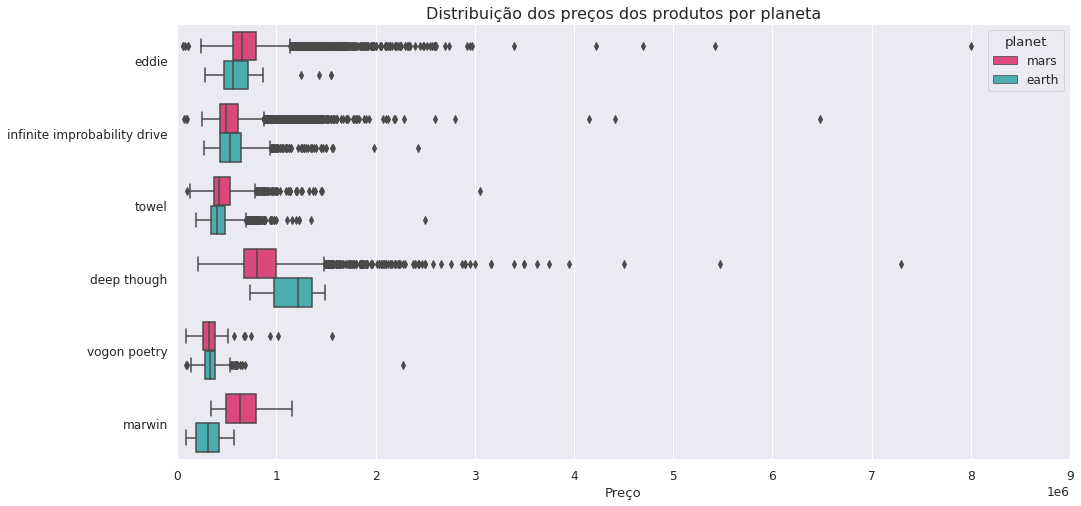

In [ ]:
plt.figure(figsize=(16,8))

ax = sns.boxplot(data=df, x='price', y='product', hue='planet', palette=['#F42F75',"#39BFBF"])
ax.set_xlabel('Preço')
ax.set_ylabel('')
ax.set_title('Distribuição dos preços dos produtos por planeta', fontsize=16)
ax.set_xlim(0, 9000000)

plt.show()

Os preços do *Marwin* e do *Deep Thought* são os que mais diferem na Terra e em Marte.

Os valores são mais discrepantes em Marte do que na Terra, assumindo valores até 6 vezes maiores que o valor máximo dos produtos.

O *Deep Thought* é o produto que tem os maiores valores, e a *Vogon Poetry* apresenta os menores valores.


## A Vida, O Universo e Tudo Mais

Finalmente vamos em busca por respostas para as nossas perguntas fundamentais. Será que é mesmo 42?

### Pergunta fundamental 1: qual o total de vendas por ano?

In [ ]:
df.groupby(df['date'].dt.year)['date'].count()

date
2007     147
2008     639
2009    1426
2010    1555
2011    1633
2012    1858
2013    2119
2014    2863
2015    3648
2016    3908
2017    4541
2018    3858
2019    1385
Name: date, dtype: int64

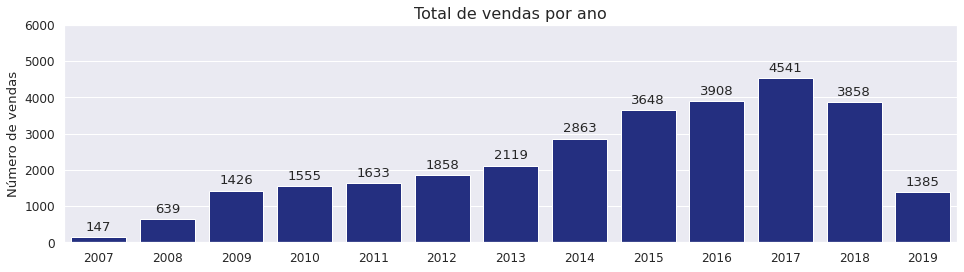

In [ ]:
plt.figure(figsize=(16,4))

ax = sns.countplot(data=df, x=df['date'].dt.year, color='#15238F')
ax.set_xlabel('')
ax.set_ylabel('Número de vendas')
ax.set_title('Total de vendas por ano', fontsize=16)
ax.set_ylim(0, 6000)
anotacao(ax)

plt.show()

Apenas 147 vendas em 2007? Certamente os clientes da Terra e de Marte ainda não sabiam da importância da toalha!

Por que será que as vendas começaram a cair em 2018 e caíram ainda mais em 2019? Precisamos comprar um *Pensador Profundo* para processar essa resposta!

In [ ]:
mars = df.query("planet == 'mars'")
earth = df.query("planet == 'earth'")

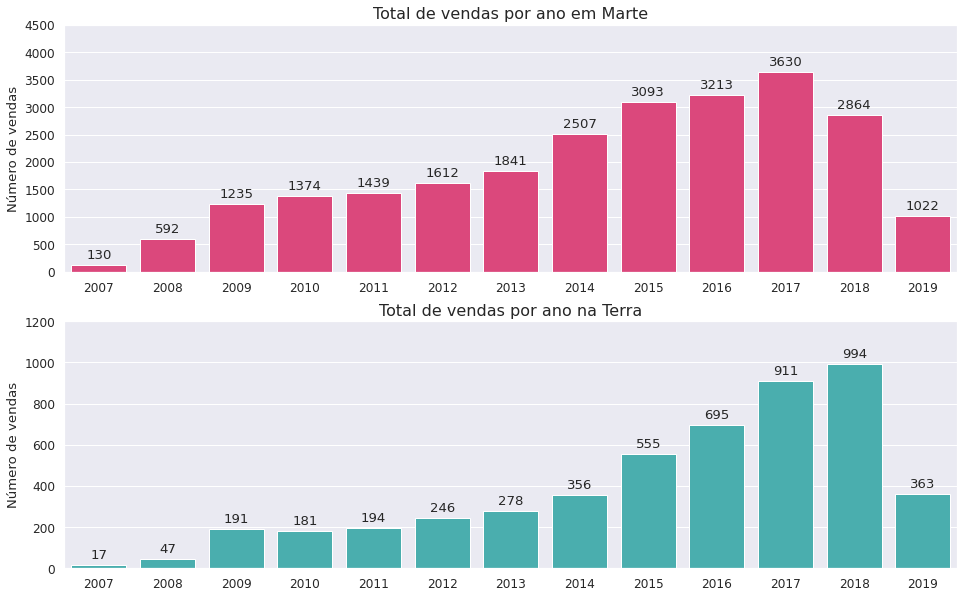

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16,10))

plt.subplot(2, 1, 1)
ax = sns.countplot(data=mars, x=mars['date'].dt.year, color='#F42F75')
ax.set_ylabel('Número de vendas')
ax.set_ylim(0, 4500)
ax.set_xlabel('')
ax.set_title('Total de vendas por ano em Marte', fontsize=16)
anotacao(ax)

plt.subplot(2, 1, 2)
ax = sns.countplot(data=earth, x=earth['date'].dt.year, color='#39BFBF')
ax.set_ylabel('Número de vendas')
ax.set_ylim(0, 1200)
ax.set_xlabel('')
ax.set_title('Total de vendas por ano na Terra', fontsize=16)
anotacao(ax)

plt.show()

Tanto em Marte quanto na Terra, as vendas tiveram grande crescimento de 2007 até 2017. 

Em Marte, as vendas começaram a cair em 2018. Já na Terra, as quedas foram somente em 2019. O que será que aconteceu com os clientes?

### Pergunta fundamental 2: qual o total de vendas por produto e planeta?




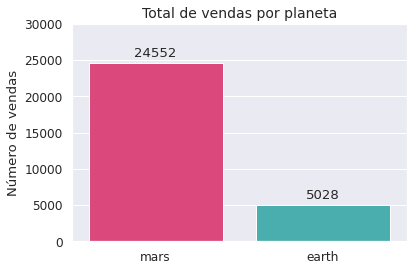

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(data=df, x='planet', palette=['#F42F75',"#39BFBF"])
ax.set_xlabel('')
ax.set_ylabel('Número de vendas')
ax.set_title('Total de vendas por planeta', fontsize=14)
ax.set_ylim(0, 30000)
anotacao(ax)

plt.show()

Xiiiii! Ao que parece os clientes da Terra não estão comprando tanto os produtos da CMFF Galaxy!

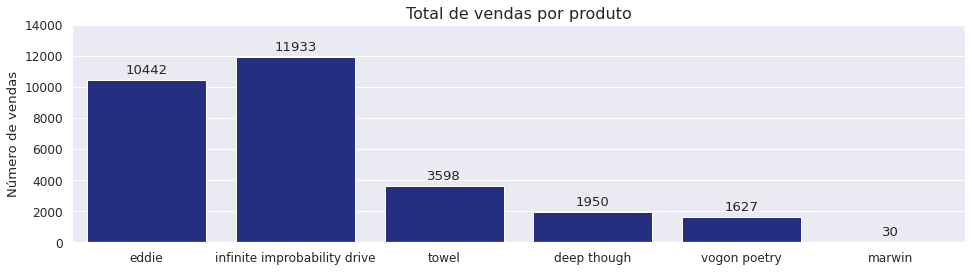

In [ ]:
plt.figure(figsize=(16,4))

ax = sns.countplot(data=df, x='product', color='#15238F')
ax.set_xlabel('')
ax.set_ylabel('Número de vendas')
ax.set_title('Total de vendas por produto', fontsize=16)
ax.set_ylim(0, 14000)
anotacao(ax)

plt.show()

> "O gerador de improbabilidade infinita é uma nova e maravilhosa invenção que
possibilita atravessar imensas distâncias interestelares num simples zerézimo de segundo, sem toda aquela complicação e chatice de ter que passar pelo hiperespaço."

O sucesso de vendas do *gerador de improbabilidade infinita* está explicado! Quem não gostaria de ter um, não é?

Mas veja bem, a CMFF Galaxy precisa pensar numa estratégia para melhorar as vendas do *Marvin*, o robô maníaco-depressivo com "o cérebro do tamanho do universo e um profundo desprezo pela humanidade".

**ATENÇÃO!** Interrompemos a programação para uma dica: [Vitor Araújo - Paranoid Android (Radiohead)](https://www.youtube.com/watch?v=b_4xLLRkjUw).

In [ ]:
pd.crosstab(index = df['product'], columns = df['planet'])

planet,earth,mars
product,,
deep though,3,1947
eddie,38,10404
infinite improbability drive,652,11281
marwin,11,19
towel,2792,806
vogon poetry,1532,95


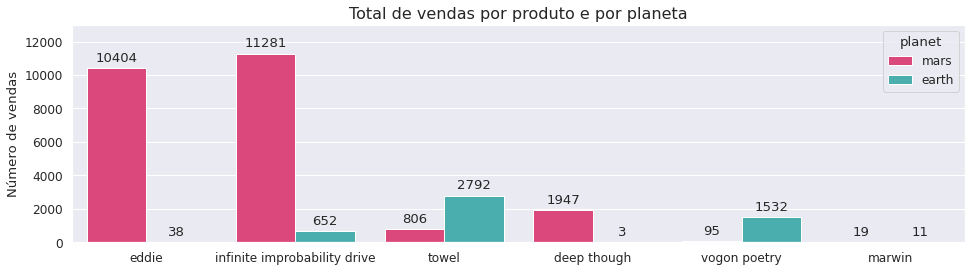

In [ ]:
plt.figure(figsize=(16,4))

ax = sns.countplot(data=df, x='product', hue='planet', palette=['#F42F75',"#39BFBF"])
ax.set_xlabel('')
ax.set_ylabel('Número de vendas')
ax.set_title('Total de vendas por produto e por planeta', fontsize=16)
ax.set_ylim(0, 13000)
anotacao(ax)

plt.show()

Pelo visto os clientes da Terra sabem bem a importância de carregar uma toalha! 55,5% do total de vendas corresponde a venda desse item indispensável para a sobrevivência.

Outro sucesso de vendas é a *Poesia Vogon*, a terceira pior do universo. Ela representa 30,5% do total de vendas na Terra.

>"Jamais, em hipótese alguma, deixe que um Vogon leia poesias para você".

O *Eddie* e o *gerador de improbabilidade infinita* foram os campeões de venda em Marte, representando 44,0% e 47,7% das vendas, respectivamente.

### Pergunta fundamental 3: série temporal do total de vendas por planeta e por produto tendo como base o número da semana

Como sabemos, a CMFF Galaxy tem clientes espalhados por toda a galáxia e eles têm diferentes noções de tempo. Mas **não entremos em pânico!**

A melhor maneira de avaliar as datas em toda a galáxia é utilizar o conceito de semana dos terráqueos e é isso que faremos.

In [ ]:
df_mars_week, df_earth_week = serie_temporal_planeta(df)

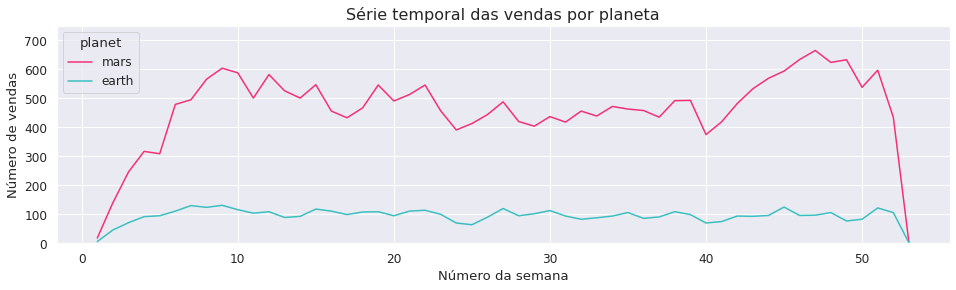

In [ ]:
plt.figure(figsize=(16,4))

ax = sns.lineplot(data=df_mars_week, color='#F42F75', label='mars')
ax = sns.lineplot(data=df_earth_week, color='#39BFBF', label='earth')
ax.set_xlabel('Número da semana')
ax.set_ylabel('Número de vendas')
ax.set_title('Série temporal das vendas por planeta', fontsize=16)
ax.set_ylim(0,750)
ax.legend(title='planet')

plt.show()

In [ ]:
df_eddie_week, df_iid_week, df_towel_week, df_dt_week, df_vp_week, df_marwin_week = serie_temporal_produto(df)

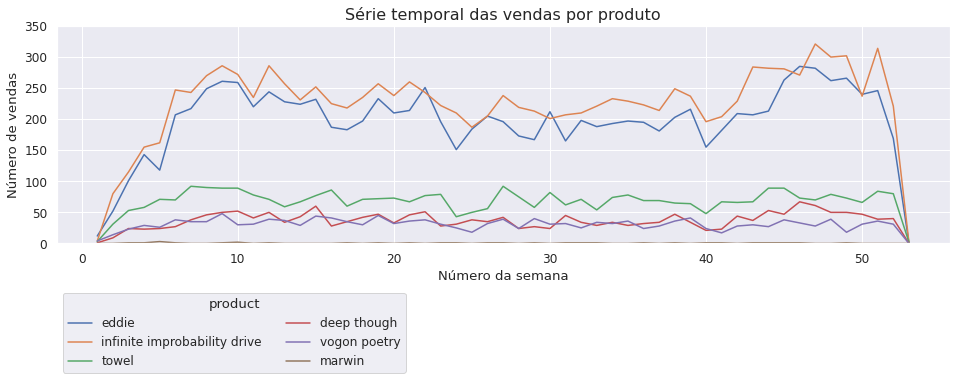

In [ ]:
plt.figure(figsize=(16,4))

ax = sns.lineplot(data=df_eddie_week, label='eddie')
ax = sns.lineplot(data=df_iid_week, label='infinite improbability drive')
ax = sns.lineplot(data=df_towel_week, label='towel')
ax = sns.lineplot(data=df_dt_week, label='deep though')
ax = sns.lineplot(data=df_vp_week, label='vogon poetry')
ax = sns.lineplot(data=df_marwin_week, label='marwin')
ax.set_xlabel('Número da semana')
ax.set_ylabel('Número de vendas')
ax.set_title('Série temporal das vendas por produto', fontsize=16)
ax.set_ylim(0,350)
ax.legend(loc='upper left', bbox_to_anchor=(0, -.2), title='product', ncol=2)

plt.show()

### Pergunta fundamental 4: qual o total de vendas do *Deep Thought* em Marte de 2015-20 a 2018-22?

> "Há muito tempo atrás, em um planeta desconhecido em outra dimensão, uma raça de seres hiperdimensionais ficou de tão saco cheio de tentar achar a resposta para o Vida, o Universo e Tudo Mais, que resolveu construir um super computador capaz de calcular uma resposta definitiva para essa pergunta. E a esse computador chamaram de Pensador Profundo."

Mesmo gerando bastante confusão, o *Pensador Profundo* é um produto importante na CMFF Galaxy. Será que as vendas foram boas em Marte entre 2015-20 e 2018-22?

In [ ]:
pergunta4 = df.query("product == 'deep though' and planet == 'mars'")
df_pergunta4 = pergunta4.resample('W', on='date').count().drop(columns=['geocode', 'price',	'planet', 'product']).rename(columns={'date': 'total_vendas'}).reset_index()
df_pergunta4['year_week'] = df_pergunta4['date'].dt.strftime('%Y-%U')

In [ ]:
df_pergunta4['year_week'].loc[lambda x: x=='2015-20']

410    2015-20
Name: year_week, dtype: object

In [ ]:
df_pergunta4['year_week'].loc[lambda x: x=='2018-22']

569    2018-22
Name: year_week, dtype: object

In [ ]:
df_pergunta4 = df_pergunta4.loc[410:569]
df_pergunta4['total_vendas'].sum()

906

In [ ]:
pergunta4_mars = df.query("planet == 'mars'")
df_pergunta4_mars = pergunta4_mars.resample('W', on='date').count().drop(columns=['geocode', 'price',	'planet', 'product']).rename(columns={'date': 'total_vendas'}).reset_index()
df_pergunta4_mars['year_week'] = df_pergunta4_mars['date'].dt.strftime('%Y-%U')

In [ ]:
df_pergunta4_mars = df_pergunta4_mars.loc[431:590]
df_pergunta4_mars['total_vendas'].sum()

10348

Pensou que a resposta seria 42? Nada disso!

Foram 906 *Pensadores Profundos* vendidos em Marte nesse período, correspondendo a 8,75% das vendas.

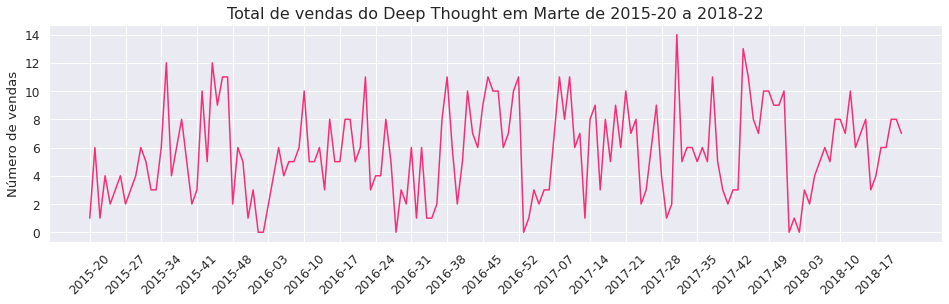

In [ ]:
plt.figure(figsize=(16,4))

ax = sns.lineplot(data=df_pergunta4, x='year_week', y='total_vendas', color='#F42F75')
ax.set_xlabel('')
ax.set_ylabel('Número de vendas')
ax.set_title('Total de vendas do Deep Thought em Marte de 2015-20 a 2018-22', fontsize=16)
#ax.set_ylim(0, 15)
ax.set_xticks(ax.get_xticks()[::7])
plt.xticks(rotation=45)

plt.show()

## E tem outra coisa...

>"...um livro que não é da Terra, jamais foi publicado na Terra e, até o dia em que ocorreu a terrível catástrofe, nenhum terráqueo jamais o tinha visto ou sequer ouvido falar dele.
<br>
Apesar disso, é um livro realmente extraordinário.
<br>
Na verdade, foi provavelmente o mais extraordinário dos livros publicados pelas grandes editoras de Ursa Menor – editoras das quais nenhum terráqueo jamais ouvira falar."

>"O tempo é uma ilusão. A hora do almoço é uma ilusão maior ainda."

Seguindo a nossa aventura pela galáxia e pelo tempo, chegou a hora de usar "o melhor guia intergaláctico que qualquer alienígena poderia ter" para prever o futuro.

O ideal seria prevermos o total de vendas em cada planeta e de cada produto, mas caro mochileiro, nesta ilusão que é o tempo, não teremos tempo para tanto. Por isso, vamos nos concentrar em prever as vendas em Marte e na Terra.

Para facilitar para os estritos, vamos separar as instruções em alguns capítulos. 

### Capítulo 1: Visualização das séries temporais

Como a noção de tempo é diferente em Marte e na Terra, vamos realizar as previsões separadamente, ok?

In [ ]:
mars = df.query("planet == 'mars'").reset_index()
earth = df.query("planet == 'earth'").reset_index()

In [ ]:
df_mars = mars.resample('W', on='date').count().drop(columns=['date', 'geocode', 'price',	'planet',	'product']).rename(columns={'index': 'total_vendas'})
df_earth = earth.resample('W', on='date').count().drop(columns=['date', 'geocode', 'price',	'planet',	'product']).rename(columns={'index': 'total_vendas'})

Valores faltantes não são bem vindos aqui!

In [ ]:
df_mars = df_mars.replace(0, np.nan)
df_mars = df_mars['total_vendas'].interpolate(method='linear').to_frame().astype('int64')

df_earth = df_earth.replace(0, np.nan)
df_earth = df_earth['total_vendas'].interpolate(method='linear').to_frame().astype('int64')

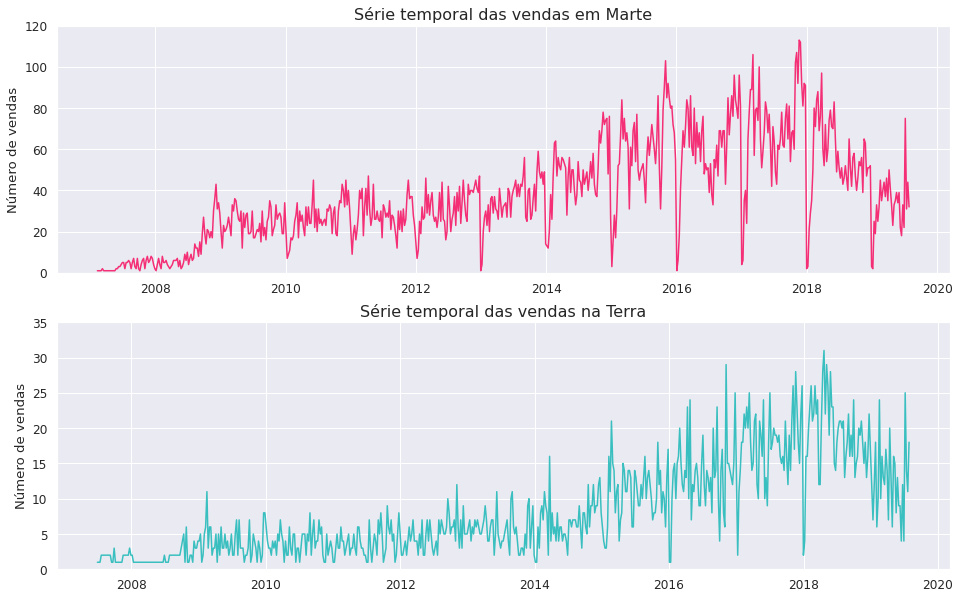

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(16,10))

plt.subplot(2, 1, 1)
ax = sns.lineplot(data=df_mars, x=df_mars.index, y='total_vendas', color='#F42F75')
ax.set_xlabel('')
ax.set_ylabel('Número de vendas')
ax.set_title('Série temporal das vendas em Marte', fontsize=16)
ax.set_ylim(0, 120)

plt.subplot(2, 1, 2)
ax = sns.lineplot(data=df_earth, x=df_earth.index, y='total_vendas', color='#39BFBF')
ax.set_xlabel('')
ax.set_ylabel('Número de vendas')
ax.set_title('Série temporal das vendas na Terra', fontsize=16)
ax.set_ylim(0, 35)

plt.show()

Check! Conseguimos visualizar as séries temporais das vendas em Marte e na Terra.

### Capítulo 2: Dados de treino e dados de teste

Para uma boa previsão, o ideal é separar os valores em treino e teste, certo?

Lembre-se: os dados de treino devem vir antes dos dados de teste. Nada de amostras aleatórias por aqui!

In [ ]:
#Marte
mars_treino = df_mars.loc[:'2018-12-30']
mars_teste = df_mars.loc['2019-01-06':]

In [ ]:
#Terra
earth_treino = df_earth.loc[:'2018-12-30']
earth_teste = df_earth.loc['2019-01-06':]

### Capítulo 3: Sazonalidade e tendência

A próxima etapa é capturar a sazonalidade e a tendência das séries temporais. 

Faremos isso utilizando o modelo multiplicativo e o período de 52 semanas - que correspondem a um ano.

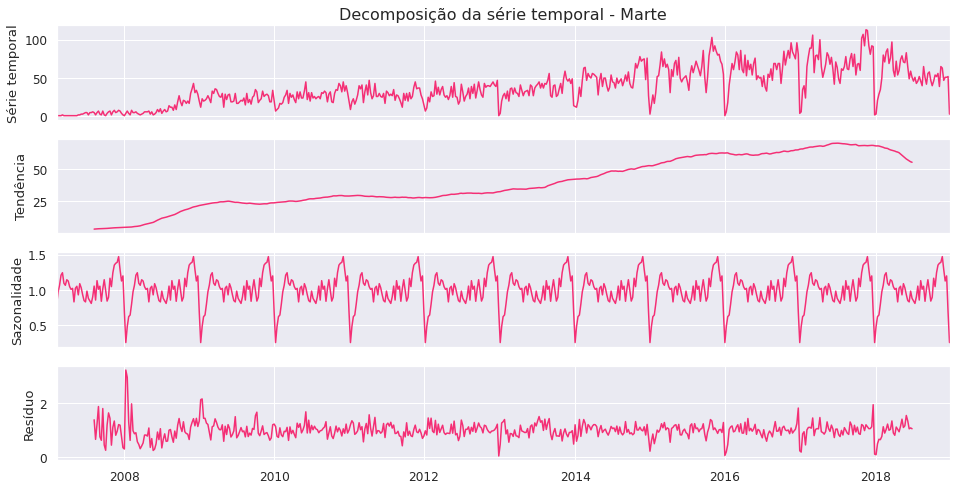

In [ ]:
#Marte
mars_decompose = seasonal_decompose(mars_treino, period=52, model='multiplicative')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(16,8), sharex=True)
mars_decompose.observed.plot(ax=ax1, color='#F42F75')
mars_decompose.trend.plot(ax=ax2, color='#F42F75')
mars_decompose.seasonal.plot(ax=ax3, color='#F42F75')
mars_decompose.resid.plot(ax=ax4, color='#F42F75')
ax1.set_title('Decomposição da série temporal - Marte', fontsize=16)
ax1.set_ylabel('Série temporal')
ax2.set_ylabel('Tendência')
ax3.set_ylabel('Sazonalidade')
ax4.set_ylabel('Resíduo')
ax4.set_xlabel('')

plt.show()

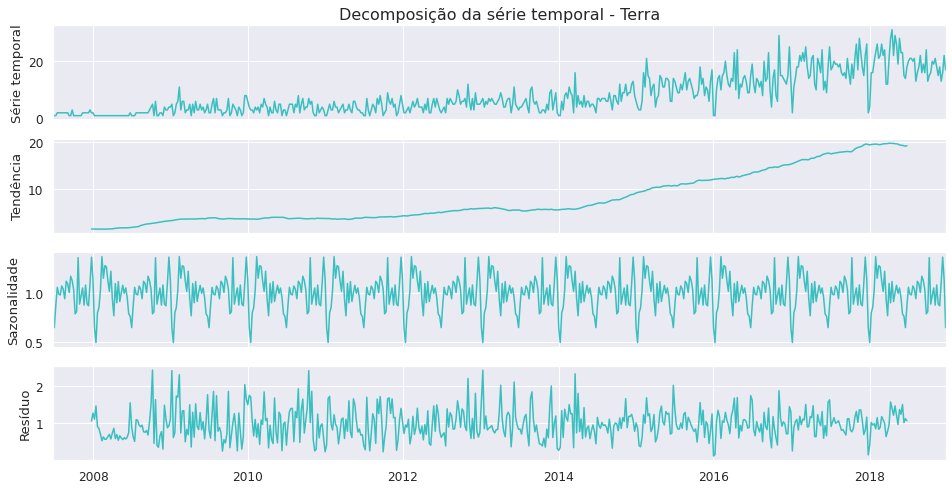

In [ ]:
#Terra
earth_decompose = seasonal_decompose(earth_treino, period=52, model='multiplicative')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(16,8), sharex=True)
earth_decompose.observed.plot(ax=ax1, color='#39BFBF')
earth_decompose.trend.plot(ax=ax2, color='#39BFBF')
earth_decompose.seasonal.plot(ax=ax3, color='#39BFBF')
earth_decompose.resid.plot(ax=ax4, color='#39BFBF')
ax1.set_title('Decomposição da série temporal - Terra', fontsize=16)
ax1.set_ylabel('Série temporal')
ax2.set_ylabel('Tendência')
ax3.set_ylabel('Sazonalidade')
ax4.set_ylabel('Resíduo')
ax4.set_xlabel('')

plt.show()

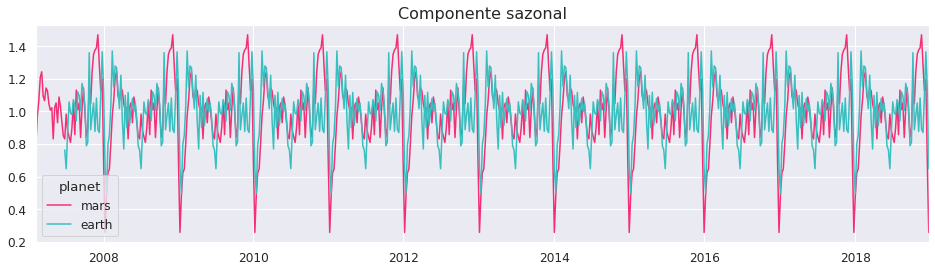

In [ ]:
#Sazonalidade
plt.figure(figsize=(16,4))

ax = mars_decompose.seasonal.plot(color='#F42F75', label='mars')
ax = earth_decompose.seasonal.plot(color='#39BFBF', label='earth')
ax.set_title('Componente sazonal', fontsize=16)
ax.set_ylabel('')
ax.set_xlabel('')
plt.legend(title='planet')

plt.show()

**Atualizações galácticas importantes**

Tanto em Marte quanto na Terra, as vendas da CMFF Galaxy caem consideravelmente no início de cada ano.

No meio de cada ano para o final, enquanto as vendas crescem em um planeta, diminuem no outro.

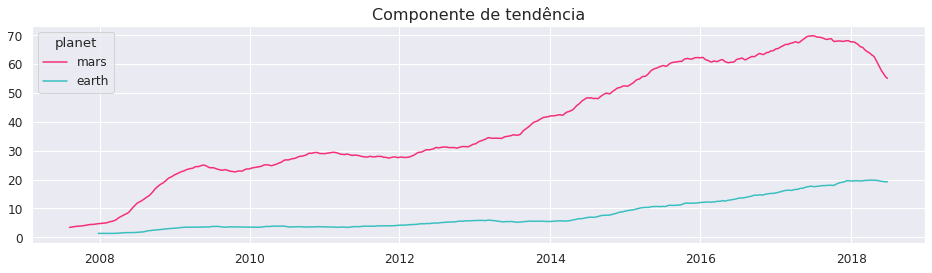

In [ ]:
#Tendência
plt.figure(figsize=(16,4))

ax = mars_decompose.trend.plot(color='#F42F75', label='mars')
ax = earth_decompose.trend.plot(color='#39BFBF', label='earth')
ax.set_title('Componente de tendência', fontsize=16)
ax.set_ylabel('')
ax.set_xlabel('')
plt.legend(title='planet')

plt.show()

**ALERTA!**

Após 11 anos de vendas em crescimento, em 2018 começamos a ver uma queda nas vendas da CMFF Galaxy. 

E a tendência é seguir caindo, principalmente em Marte, onde a coisa está feia!

Hora de acionar os responsáveis para dar um jeito nisso!

Sazonalidade e tendência: check!

Hora de começarmos as nossas previsões.

### Capítulo 4: Modelos de previsão de séries temporais

**Primeira parada: média móvel.**

A média móvel utiliza resultados de vendas passadas para prever o comportamento da demanda em um futuro próximo. 

Ela é a média de uma janela móvel de largura definida e vai se movendo e sendo calculada sempre usando essa determinada janela.

Vamos testar aqui os períodos de 4 semanas, 13 semanas, 26 semanas e 52 semanas, combinado? E a partir das métricas, vamos avaliar qual o melhor período.

In [ ]:
#Marte
calcula_erro_treino('mars', df_mars)

,media_movel_52,media_movel_26,media_movel_4,media_movel_13
,,,,
VIÉS,0.24,0.04,0.06,0.00
MSE,199.20,198.50,64.93,139.79
RMSE,14.11,14.09,8.06,11.82
MAE,9.72,9.46,5.69,8.08
MAPE,67.39,65.74,36.74,56.01


In [ ]:
#Terra
calcula_erro_treino('earth', df_earth)

,media_movel_52,media_movel_26,media_movel_4,media_movel_13
,,,,
VIÉS,0.05,0.02,0.02,0.01
MSE,11.23,10.51,6.83,10.18
RMSE,3.35,3.24,2.61,3.19
MAE,2.32,2.23,1.78,2.17
MAPE,53.20,50.03,36.26,47.88


Considerando as métricas, tanto para Marte quanto para a Terra, a média móvel com o período de 4 semanas é a que nos dá a melhor resposta.

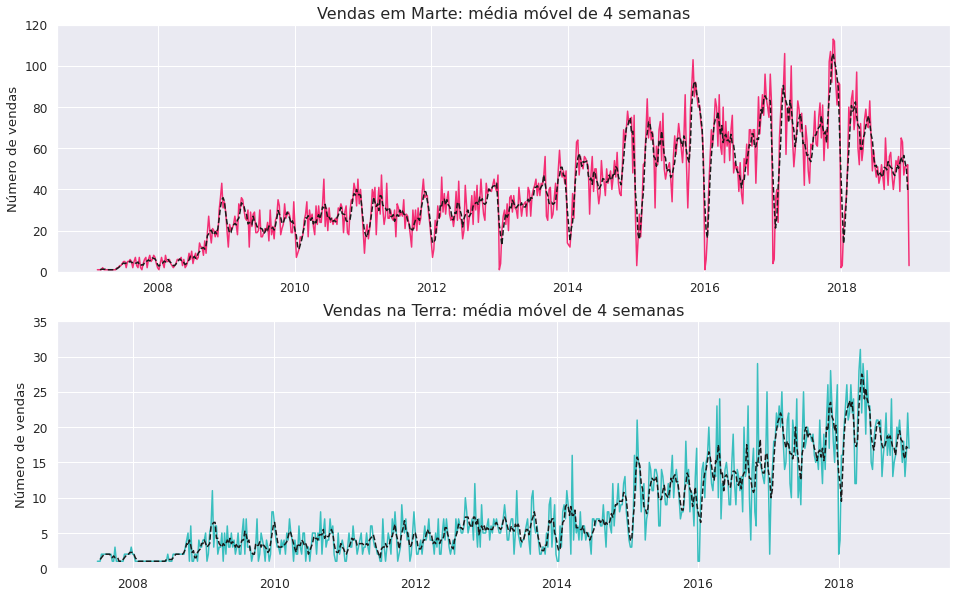

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(16,10))

plt.subplot(2, 1, 1)
mars_treino['media_movel'] = mars_treino['total_vendas'].dropna().rolling(4, center=True).mean()
ax = sns.lineplot(data=mars_treino, x=mars_treino.index, y='total_vendas', color='#F42F75')
ax = sns.lineplot(data=mars_treino, x=mars_treino.index, y='media_movel', color='k', ls='--', lw=1.5)
ax.set_xlabel('')
ax.set_ylabel('Número de vendas')
ax.set_title('Vendas em Marte: média móvel de 4 semanas', fontsize=16)
ax.set_ylim(0, 120)

plt.subplot(2, 1, 2)
earth_treino['media_movel'] = earth_treino['total_vendas'].rolling(4, center=True).mean()
ax = sns.lineplot(data=earth_treino, x=earth_treino.index, y='total_vendas', color='#39BFBF')
ax = sns.lineplot(data=earth_treino, x=earth_treino.index, y='media_movel', color='k', ls='--', lw=1.5)
ax.set_xlabel('')
ax.set_ylabel('Número de vendas')
ax.set_title('Vendas na Terra: média móvel de 4 semanas', fontsize=16)
ax.set_ylim(0, 35)

plt.show()

**Segunda parada: Método de Holt-Winters**

Os métodos de suavização exponencial, como o [Holt-Winters](https://medium.datadriveninvestor.com/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1), atribuem pesos decrescentes exponencialmente para observações anteriores. Quanto mais recente for a observação obtida, maior será o peso atribuído.

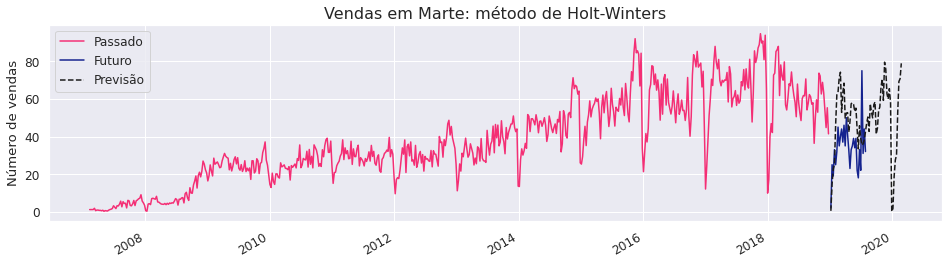

In [ ]:
#Marte
fit = ExponentialSmoothing(mars_treino['total_vendas'], seasonal_periods=52, trend='add', seasonal='add').fit(use_boxcox=True)

plt.figure(figsize=(16,4))

plt.plot(mars_teste['total_vendas'], label='Futuro', color='#15238F')
fit.fittedvalues.plot(label='Passado', color='#F42F75')
fit.forecast(60).plot(legend=True, label='Previsão', color='k', ls='--', lw=1.5)
handles, labels = plt.gca().get_legend_handles_labels()
handles = [handles[1], handles[0], handles[2]]
labels = [labels[1], labels[0], labels[2]]
plt.legend(handles, labels)
plt.title('Vendas em Marte: método de Holt-Winters', fontsize=16)
plt.ylabel('Número de vendas')
plt.xlabel('')

plt.show()

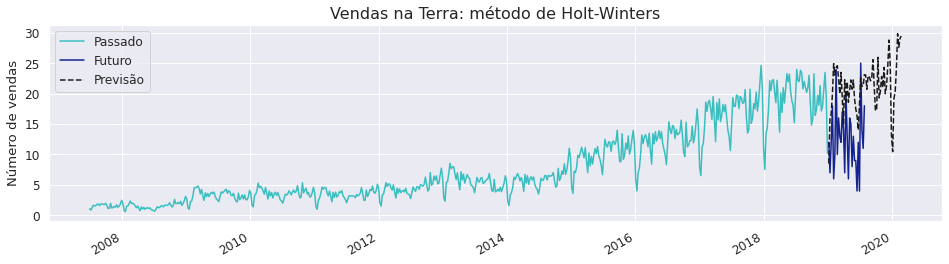

In [ ]:
#Terra
fit = ExponentialSmoothing(earth_treino['total_vendas'], seasonal_periods=52, trend='add', seasonal='add').fit(use_boxcox=True)

plt.figure(figsize=(16,4))

plt.plot(earth_teste['total_vendas'], label='Futuro', color='#15238F')
fit.fittedvalues.plot(label='Passado', color='#39BFBF')
fit.forecast(60).plot(legend=True, label='Previsão', color='k', ls='--', lw=1.5)
handles, labels = plt.gca().get_legend_handles_labels()
handles = [handles[1], handles[0], handles[2]]
labels = [labels[1], labels[0], labels[2]]
plt.legend(handles, labels)
plt.title('Vendas na Terra: método de Holt-Winters', fontsize=16)
plt.ylabel('Número de vendas')
plt.xlabel('')

plt.show()

É, mochileiros, parece que este método está superestimando as vendas e não acompanha a tendência de queda que nós observamos anteriormente. 

Entretanto, é possível observar a queda que ocorre no início de cada ano.

Estamos com dificuldade em prever o futuro por aqui!

**Terceira parada: Prophet**

O [Prophet](https://facebook.github.io/prophet/) é uma ferramenta open source para previsão de séries temporais desenvolvida pelo Facebook Research.

A biblioteca em Python fornece parâmetros intuitivos e facilmente interpretáveis ​​que permitem melhorar gradualmente a qualidade do modelo de previsão.

In [ ]:
df_mars = df_mars.reset_index().rename(columns={'date': 'ds', 'total_vendas': 'y'})

In [ ]:
df_earth = df_earth.reset_index().rename(columns={'date': 'ds', 'total_vendas': 'y'})

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


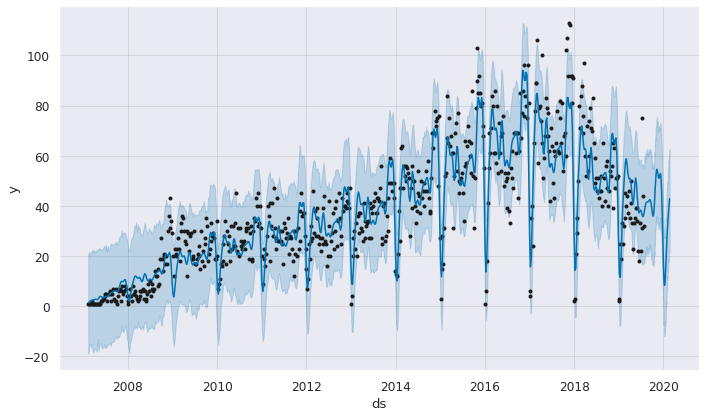

In [ ]:
#Marte
profeta = Prophet(seasonality_mode='multiplicative', interval_width = 0.95, yearly_seasonality = True) 
profeta_mars = profeta.fit(df_mars)
future_mars = profeta_mars.make_future_dataframe(periods=208)
forecast_mars = profeta_mars.predict(future_mars)

profeta_mars.plot(forecast_mars);

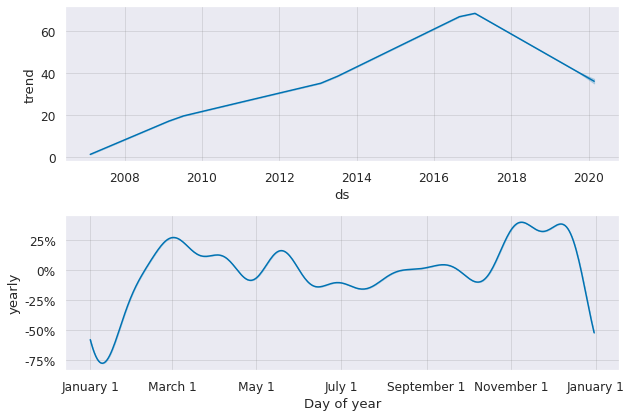

In [ ]:
#Marte
profeta_mars.plot_components(forecast_mars);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


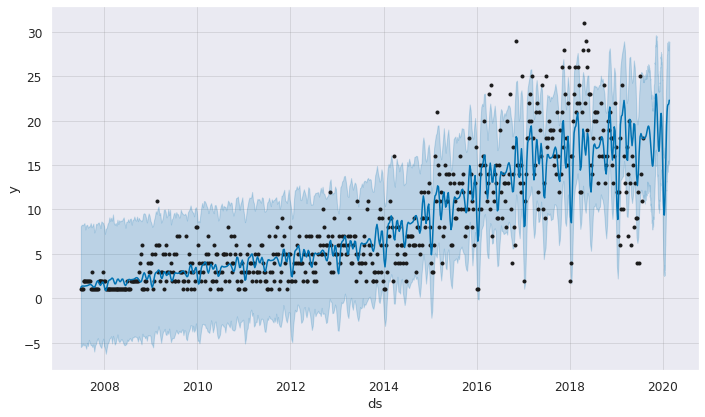

In [ ]:
#Terra
profeta = Prophet(seasonality_mode='multiplicative', interval_width = 0.95, yearly_seasonality = True) 
profeta_earth = profeta.fit(df_earth)
future_earth = profeta_earth.make_future_dataframe(periods=208)
forecast_earth = profeta_earth.predict(future_earth)
profeta_earth.plot(forecast_earth);

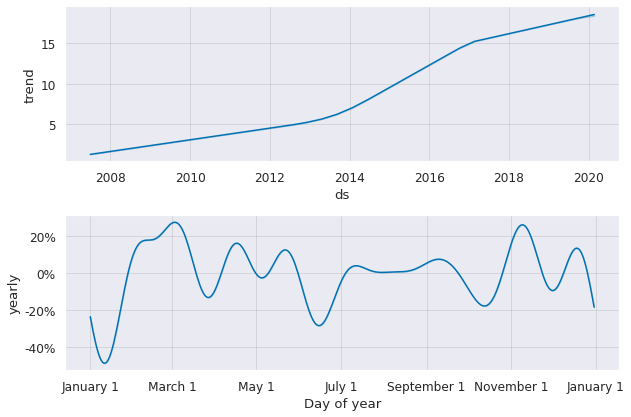

In [ ]:
#Terra
profeta_earth.plot_components(forecast_earth);

Yaaaaaay! As previsões utilizando o Prophet ficaram bem melhores, não é mesmo?

E mais uma vez é possível observar a tendência de queda e a queda que ocorre no início de cada ano. 

**Dica:** o [modelo SARIMA](http://sillasgonzaga.com/material/curso_series_temporais/arima.html#modelos-sarima) também poderia ser utilizado para realizar as previsões.

**Mais uma dica:** para uma série temporal sem componente sazonal, o [modelo ARIMA](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/) é mais indicado, tudo bem?

**Spoiler**: no apêndice é possível encontrar instruções de como encontrar os parâmetros para os modelos ARIMA e SARIMA.

## Até mais, e obrigado pelos peixes!

Finalmente estamos de volta à Terra.

Se você chegou até aqui, muito obrigada!

Peço desculpas por qualquer furo na história que foi contada, e espero que Douglas Adams também me perdoe, onde quer que ele esteja!

> "Contemplaram a Mensagem Final de Deus, maravilhados, e uma enorme sensação de paz os invadiu, lenta e inefável, uma sensação de compreensão total e definitiva."

## Apêndice

Para podermos aplicar modelos de previsão autorregressivos como ARIMA e SARIMA, temos que verificar se as séries temporais são estacionárias, ou seja, com propriedades estatísticas, como a média, a variância e a autocorrelação, constantes ao longo do tempo.

In [ ]:
mars = df.query("planet == 'mars'").reset_index()
earth = df.query("planet == 'earth'").reset_index()

In [ ]:
df_mars = mars.resample('W', on='date').count().drop(columns=['date', 'geocode', 'price',	'planet',	'product']).rename(columns={'index': 'total_vendas'})
df_earth = earth.resample('W', on='date').count().drop(columns=['date', 'geocode', 'price',	'planet',	'product']).rename(columns={'index': 'total_vendas'})

In [ ]:
#Marte
mars_treino = df_mars.loc[:'2018-12-30']
mars_teste = df_mars.loc['2019-01-06':]

In [ ]:
#Terra
earth_treino = df_earth.loc[:'2018-12-30']
earth_teste = df_earth.loc['2019-01-06':]

In [ ]:
x_mars = mars_treino
result_mars = adfuller(x_mars)

print('ADF Statistic: %f' % result_mars[0])
print('p-value: %f' % result_mars[1])
print("usedlag: %f" % result_mars[2])
print('Critical Values:')
for key, value in result_mars[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.949797
p-value: 0.309010
usedlag: 19.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


In [ ]:
x_earth = earth_treino
result_earth = adfuller(x_earth)

print('ADF Statistic: %f' % result_earth[0])
print('p-value: %f' % result_earth[1])
print("usedlag: %f" % result_earth[2])
print('Critical Values:')
for key, value in result_earth[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.047998
p-value: 0.735358
usedlag: 12.000000
Critical Values:
	1%: -3.442
	5%: -2.866
	10%: -2.569


Eita! *p-value* maior que 5%, não temos séries temporais estacionárias por aqui!

Próximo passo: transformar as séries em estacionárias.

In [ ]:
ndiffs(mars_treino)

1

In [ ]:
ndiffs(earth_treino)

1

In [ ]:
mars_treino['aumento'] = mars_treino['total_vendas'].diff()
earth_treino['aumento'] = earth_treino['total_vendas'].diff()

In [ ]:
x_mars = mars_treino['aumento'].dropna()
result_mars = adfuller(x_mars)

print('ADF Statistic: %f' % result_mars[0])
print('p-value: %f' % result_mars[1])
print("usedlag: %f" % result_mars[2])
print('Critical Values:')
for key, value in result_mars[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.743871
p-value: 0.000000
usedlag: 19.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


In [ ]:
x_earth = earth_treino['aumento'].dropna()
result_earth = adfuller(x_earth)

print('ADF Statistic: %f' % result_earth[0])
print('p-value: %f' % result_earth[1])
print("usedlag: %f" % result_earth[2])
print('Critical Values:')
for key, value in result_earth[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.367381
p-value: 0.000000
usedlag: 11.000000
Critical Values:
	1%: -3.442
	5%: -2.866
	10%: -2.569


*p-value* igual a 0 para as duas séries.

Séries estacionárias confirmadas.

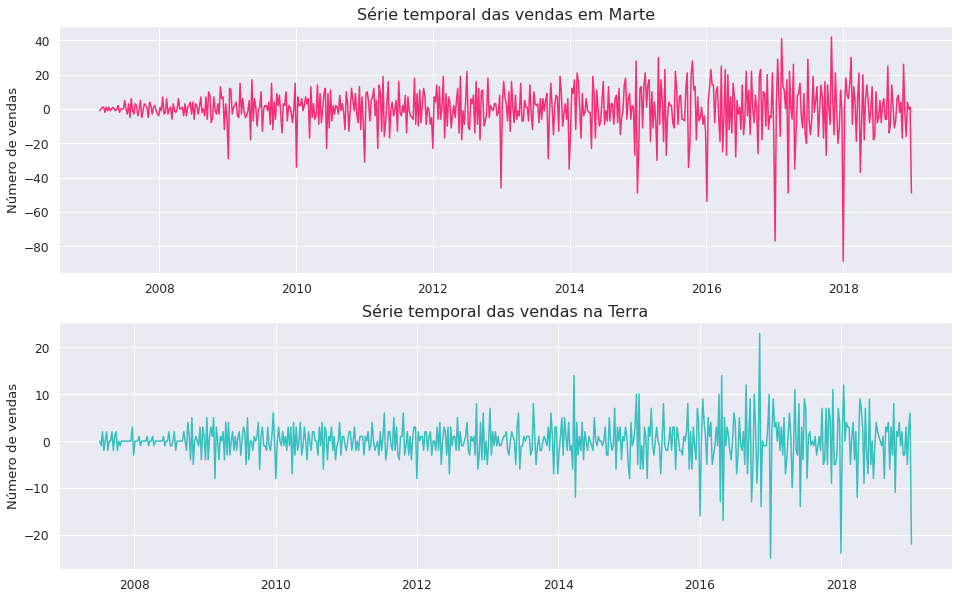

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(16,10))

plt.subplot(2, 1, 1)
ax = sns.lineplot(data=mars_treino, x=mars_treino.index, y='aumento', color='#F42F75')
ax.set_xlabel('')
ax.set_ylabel('Número de vendas')
ax.set_title('Série temporal das vendas em Marte', fontsize=16)

plt.subplot(2, 1, 2)
ax = sns.lineplot(data=earth_treino, x=earth_treino.index, y='aumento', color='#39BFBF')
ax.set_xlabel('')
ax.set_ylabel('Número de vendas')
ax.set_title('Série temporal das vendas na Terra', fontsize=16)

plt.show()

Os gráficos de autocorrelação e autocorrelação parcial das séries estacionárias nos ajudam a encontrar os lags a serem usados para criar previsões para eventos futuros.

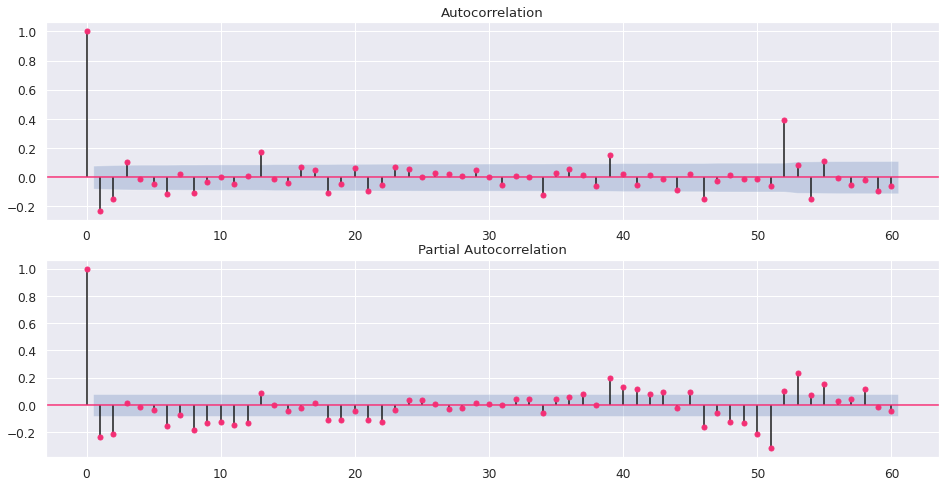

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,8))

plot_acf(mars_treino['aumento'].dropna(), lags= 60, ax=ax1, color='#F42F75')
plot_pacf(mars_treino['aumento'].dropna(),lags= 60, ax=ax2, color='#F42F75')

plt.show()

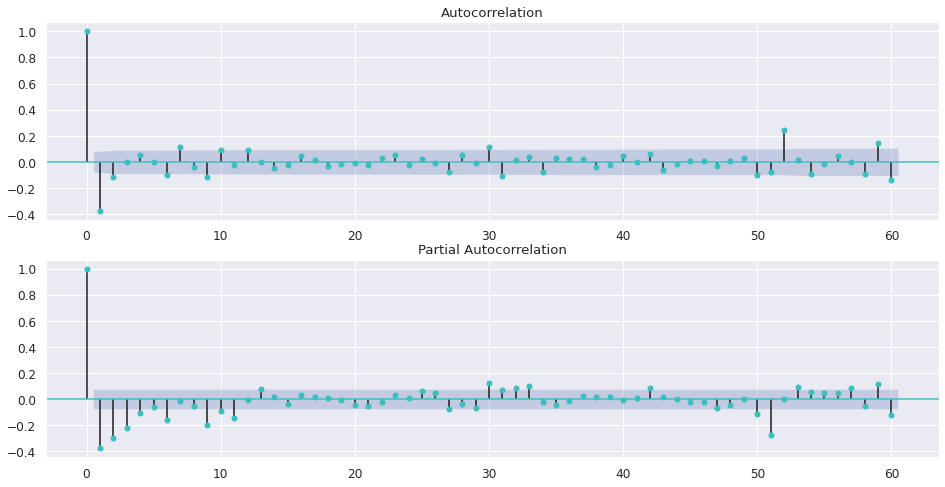

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,8))

plot_acf(earth_treino['aumento'].dropna(), lags= 60, ax=ax1, color='#39BFBF')
plot_pacf(earth_treino['aumento'].dropna(),lags= 60, ax=ax2, color='#39BFBF')

plt.show()